# Inferência Estatística - Prova 2
### Questões computacionais
### Aluno: Fábio Corrêa Cordeiro

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
import pandas as pd
import math
from scipy import special

## 1 - Introdução (20 pontos)

(4 pts) A distribuição $Beta(p,q)$ é interessante pois sua densidade pode assumir diversas formas quando variamos os parâmetros $p,q$. Estude computacionalmente o comportamento da distribuição $Beta(p,q)$ nos casos $p = q = 1$, e $p,q$ grandes (tendendo ao infinito). Apresente histogramas e discuta o que foi observado.

Vamos testar três valores para $p$ e três para $q$, com isso tremos 9 cenários. Para cada cenário, amostramos aleatóriamente 10.000 observações que seguem a distribuição $Beta(p,q)$ respeitando os respectivos parâmetros $p,q$. Abaixo se encontra o histograma das 10.000 amostras para cada cenário e uma linha de tendência para representar a distribuição contínua.

In [61]:
#Número de amostras
n = 10000
# Amostras da distribuição Beta para diferentes valores de p e q.
p_1_q_1 = np.random.beta(1,1,n)
p_1_q_10 = np.random.beta(1,10,n)
p_1_q_100 = np.random.beta(1,100,n)

p_10_q_1 = np.random.beta(10,1,n)
p_10_q_10 = np.random.beta(10,10,n)
p_10_q_100 = np.random.beta(10,100,n)

p_100_q_1 = np.random.beta(100,1,n)
p_100_q_10 = np.random.beta(100,10,n)
p_100_q_100 = np.random.beta(100,100,n)

Distribuições Beta


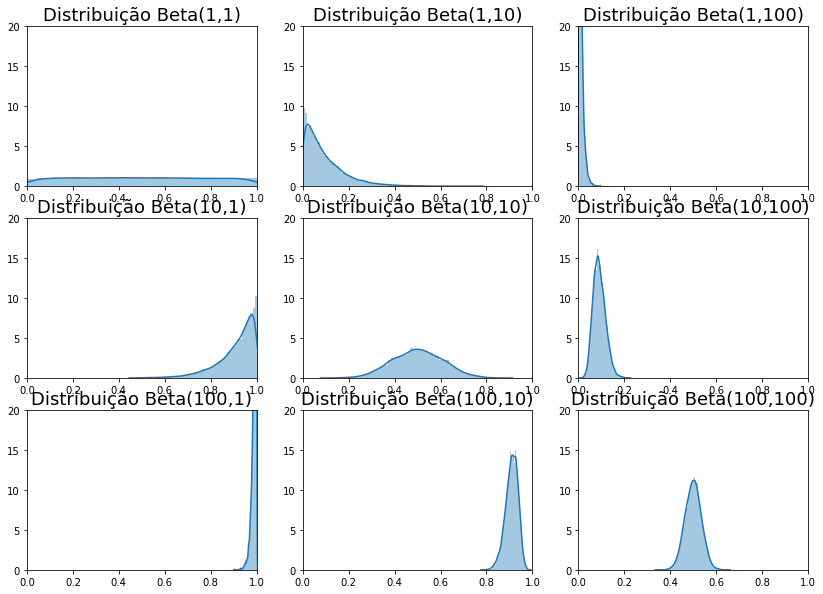

In [62]:
fig, ax = plt.subplots(3, 3, figsize=(14,10))
sns.distplot(p_1_q_1,bins='fd', ax=ax[0,0])
ax[0,0].set_title('Distribuição Beta(1,1)', fontsize=18)
ax[0,0].set_xlim(0,1)
ax[0,0].set_ylim(0,20)

sns.distplot(p_1_q_10,bins='fd', ax=ax[0,1])
ax[0,1].set_title('Distribuição Beta(1,10)', fontsize=18)
ax[0,1].set_xlim(0,1)
ax[0,1].set_ylim(0,20)

sns.distplot(p_1_q_100,bins='fd', ax=ax[0,2])
ax[0,2].set_title('Distribuição Beta(1,100)', fontsize=18)
ax[0,2].set_xlim(0,1)
ax[0,2].set_ylim(0,20)

sns.distplot(p_10_q_1,bins='fd', ax=ax[1,0])
ax[1,0].set_title('Distribuição Beta(10,1)', fontsize=18)
ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(0,20)

sns.distplot(p_10_q_10,bins='fd', ax=ax[1,1])
ax[1,1].set_title('Distribuição Beta(10,10)', fontsize=18)
ax[1,1].set_xlim(0,1)
ax[1,1].set_ylim(0,20)

sns.distplot(p_10_q_100,bins='fd', ax=ax[1,2])
ax[1,2].set_title('Distribuição Beta(10,100)', fontsize=18)
ax[1,2].set_xlim(0,1)
ax[1,2].set_ylim(0,20)

sns.distplot(p_100_q_1,bins='fd', ax=ax[2,0])
ax[2,0].set_title('Distribuição Beta(100,1)', fontsize=18)
ax[2,0].set_xlim(0,1)
ax[2,0].set_ylim(0,20)

sns.distplot(p_100_q_10,bins='fd', ax=ax[2,1])
ax[2,1].set_title('Distribuição Beta(100,10)', fontsize=18)
ax[2,1].set_xlim(0,1)
ax[2,1].set_ylim(0,20)

sns.distplot(p_100_q_100,bins='fd', ax=ax[2,2])
ax[2,2].set_title('Distribuição Beta(100,100)', fontsize=18)
ax[2,2].set_xlim(0,1)
ax[2,2].set_ylim(0,20)
print('Distribuições Beta')

Ao variar os parâmetros $p,q$ podemos alterar consideravelmete o formato da distribuição. Quando os valores de $p$ e $q$ são iguais, a distribuição é centrada em 0.5; mas quanto maior o valor de $p$ e $q$, menor é a variância. Outra característica é o deslocamento da distribuição em relação ao centro. Quanto maior é $p$ em relação a $q$, mais deslocada para direita está a distribuição; quando o inverso ocorre, a distribuição se desloca para a esquerda.

## 3 Aplicação (25 pontos)

In [66]:
# Carregando os dados
tabela = pd.read_csv('petroleo.csv')
tabela

,conversao,10 pts ATSM,G1,G2,G3,G4,G5,G6,G7,G8,G9,temp_gas
0,0.122,190,1,0,0,0,0,0,0,0,0,205
1,0.223,190,1,0,0,0,0,0,0,0,0,275
2,0.347,190,1,0,0,0,0,0,0,0,0,345
3,0.457,190,1,0,0,0,0,0,0,0,0,407
4,0.080,210,0,1,0,0,0,0,0,0,0,218
5,0.131,210,0,1,0,0,0,0,0,0,0,273
6,0.266,210,0,1,0,0,0,0,0,0,0,347
7,0.074,217,0,0,1,0,0,0,0,0,0,212
8,0.182,217,0,0,1,0,0,0,0,0,0,272
9,0.304,217,0,0,1,0,0,0,0,0,0,340


### 1. (Estimação - 5 pts) Estime os parâmetros ($\beta_1$,...,$\beta_{11}$, $\phi$) utilizando o método do score de Fisher desenvolvido acima.

Para estimar os parâmetros usando o método de Fisher, é necessário calcular a função de log-verossimilhança e a matriz de informação de Fisher ($K$). Abaixo, implementamos algumas funções necessárias para o cálculo.

In [212]:
beta = [0., 1., 0., 0.5, 0., 0., 0., 0., 0., 0., 0.]
x = [0., 1., 1., 0., 0.9, 1., 0., 1.5, 0., 0., 0.]
phi = 1
y = 0.5

# Função para calcular mu
def mu(beta, x):
    return (math.exp(np.dot(x, beta)) / (1 + math.exp(np.dot(x, beta))))

    
# Função de log-verossimilhança
def log_ver(beta, x, phi, y):
    logver = (math.log( math.gamma(phi)) -
              math.log( math.gamma(mu(beta, x) * phi)) -
              math.log( math.gamma(phi - mu(beta, x) * phi)) +
              (mu(beta,x) * phi - 1) * math.log(y) +
              (phi - mu(beta,x) * phi - 1) * math.log(1 - y))
    return(logver)

# Função para iterar por todas as linhas da tabela de dados e somar a log-verossimilhança
def soma_log_ver(tabela, beta, phi):
    soma = 0
    for linha in tabela.values:
        x = linha[1:]
        y = linha[0]
        soma = soma + log_ver(beta, x, phi, y)
    return(soma)

# Função para calcular a derivado do modelo g(mu).
def deriv_g(beta, x):
    return(1/(mu(beta, x) + mu(beta, x)**2))

# Função para calcular W.
def w_i(beta, x, phi):
    w = (phi * (special.polygamma(1, mu(beta, x) * phi) +
                special.polygamma(1, (1- mu(beta, x)) * phi)) *
         1/(deriv_g(beta, x)) ** 2)
    return(w)

# Função para calcular C.
def c_i(beta, x, phi):
    C = (phi * (special.polygamma(1, mu(beta, x) * phi) * mu(beta, x) -
                special.polygamma(1, (1- mu(beta, x)) * phi) * 
                (1- mu(beta, x))))
    return (C)

# Função para calcular D.
def d_i(beta, x, phi):
    D = (special.polygamma(1, mu(beta, x) * phi) * mu(beta, x) ** 2 +
         special.polygamma(1, (1 - mu(beta, x)) * phi) * 
         (1 - mu(beta, x)) ** 2 -
         special.polygamma(1, phi))
    return (D)

# Função para calcular y_asteristico.
def y_ast(y):
    return (math.log(y/(1+y)))

# Função para calcular mu_asteristico.
def mu_ast(beta, x, phi):
    mu_o = (special.polygamma(1, mu(beta, x) * phi) -
           special.polygamma(1, (1- mu(beta, x)) * phi))
    return (mu_o)

Funções para iterar pela tabela de dados e montar as matrizes necessárias.

In [261]:
# Matriz X
X = tabela.values[:,1:]

# Matriz T
def T(tabela, beta):
    g = []
    for linha in tabela.values[:]:
        x = linha[1:]
        g.append(1/deriv_g(beta, x))
    return(np.diag(g))

# Matriz W
def W(tabela, beta, phi):
    w = []
    for linha in tabela.values[:]:
        x = linha[1:]
        w.append(w_i(beta, x, phi))
    return(np.diag(w))

# Vetor C
def C(tabela, beta, phi):
    c = []
    for linha in tabela.values[:]:
        x = linha[1:]
        c.append(c_i(beta, x, phi))
    return(c)

# Matriz D
def D(tabela, beta, phi):
    d = []
    for linha in tabela.values[:]:
        x = linha[1:]
        d.append(d_i(beta, x, phi))
    return(np.diag(d))

# Função para calcular y_asteristico - mu_asteristico.
def y_menos_mu(tabela, beta, phi):
    y_mu = []
    for linha in tabela.values[:]:
        x = linha[1:]
        y = linha[0]
        y_mu.append(y_ast(y) - mu_ast(beta, x, phi))
    return(np.array(y_mu))

Funções Scores

In [285]:
# Score de Beta
def S_beta (tabela, beta, phi, X):    
    s_beta = phi * np.matmul(X.transpose(),
                             np.matmul(T(tabela, beta),
                                       y_menos_mu(tabela, beta, phi)))
    return(s_beta)

def Score_phi(tabela, beta, phi):
    score_phi = []
    for linha in tabela.values[:]:
        x = linha[1:]
        y = linha[0]
        score = (mu(beta, x) *
                 (y_ast(y) - mu_ast(beta, x, phi)) +
                 math.log(1 - y) -
                 special.polygamma(0, (1 - mu(beta, x)) * phi) +
                 special.polygamma(0, (phi)))
        score_phi.append(score)
    return(np.array(score_phi))

Calculando as matriz de informação de Fisher

In [304]:
# K_beta_beta
K_beta_beta = phi * np.matmul(X.transpose(),
                    np.matmul(W(tabela, beta, phi), X))
K_beta_phi =  (np.matmul(X.transpose(), 
                         np.matmul(T(tabela, beta), 
                                   C(tabela, beta, phi))))
K_phi_phi = special.polygamma(1,D(tabela, beta, phi))

Em seguida, é necessário implementar a função para calcular a variação do estimador em cada iteração, para em seguida implementar o processo de iteração em si. Lembrando de acrescentar o método de parada.

### 2. (Apresentação dos resultados - 5 pts ) Construa uma tabela com os valores estimados para os parâmetros  seu desvio padrão


### 3. (95% IC Bootstrap - 5 pts) Construa intervalos de confiança nível 95% para cada um dos parâmetros utilizando B = 1000 replicações bootstrap (não paramétrico) da estatística t.

Utilizando o código apresentado pelo professor durante as aulas

In [ ]:
# Create one bootstrap subsample from X size n
def bootstrap_resample(X,n=None):
    # X - original dataset list of nparrays of a nparray
    # n - size of bootstrap sample, n=len(X) if none
    if type(X) == list:
        T = []
        for Z in X:
            if n == None:
                n = Z.shape[0]
            i = np.random.randint(0,len(Z),n)
            T.append(Z[i])
        return T
    if n == None:
        n = X.shape[0]
    i = np.random.randint(0,len(X),n)
    return X[i]

# calculate boostrap distribution of some arbitraty function of the sample
def bootstrap_stat(X,Z,fcn,n=None):
    # X - original dataset
    # Z - vector to store bootstrap samples kxm
    # fcn - statistics 
    # n - size of bootstrap sample, n=len(X) if None  
    k = len(fcn)
    m = Z.shape[1]
    for i in range(0,m):
        s = bootstrap_resample(X,n)
        for j in range(0,k):
            Z[j,i] = fcn[j](s)

### 4. (Teste de especificação - 5 pts)

### 5. (Valores críticos bootstrap - 5 pts) Agora vamos utilizar bootstrap paramétrico para calcular o valor crítico do teste e testarmos novamente a hipótese.

Usando como base o código disponibilizado pelo professor durante a aula. 

In [316]:
# Bootstrap paramétrico
mu = 10
p = 1
q = 1
X = np.random.gamma(mu,sigma,n)

m = 1000 #bootstrap samples
Z = np.random.normal(X.mean(), X.std(), (m,n))

In [317]:
T = np.zeros(m)
for i in range(m):
    T[i] = (Z[i].mean()-X.mean())/Z[i].std()
q05hat = np.quantile(T,(.025,.975))
CI = X.mean()+X.std()*q05hat
print(CI)

[ 8.87818471 11.51101289]
